# Read data 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as mt
A = mt.read_csv("C:/Users/SHREE/Desktop/Data/Cars93-1.csv")

# Preview

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Missing data treatment

In [9]:
from important_tool import replacer
replacer(A)

# Define Clustering column

In [10]:
B = A[["MPG.city","Price"]]#[0:30]

# Preprocessing

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Q = mt.DataFrame(mm.fit_transform(B),columns=["MPG.city","Price"])

# Create Clustering

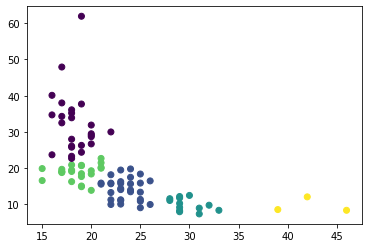

In [12]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=5)
model = ag.fit(Q)
import matplotlib.pyplot as plt
plt.scatter(A['MPG.city'],A.Price,c=list(model.labels_))


# Create a Dendrogram

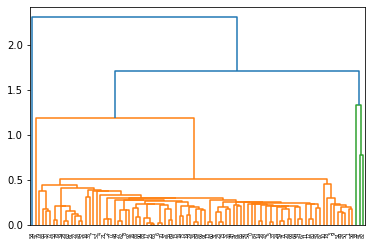

In [13]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial import distance_matrix
dm = distance_matrix(Q.values,Q.values)
dendrogram(linkage(dm))
plt.show()